In [1]:
import numpy as np                    # for the 2-D matrices
import pandas as pd                   # for the Data frames
import matplotlib.pyplot as plt       # for the visualization
import seaborn as sns                 # for the visualization
import warnings
warnings.filterwarnings('ignore')     #

# Loading and Exploring the data.

In [4]:
df=pd.read_csv("E:\documents\zomato.csv_(1)[1]\zomato.csv")

In [5]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [6]:
df.drop (columns=["url","address","phone","menu_item"],inplace=True)

In [7]:
df.shape

(51717, 13)

In [8]:
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [9]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51717 non-null  object
 1   online_order     51717 non-null  object
 2   book_table       51717 non-null  object
 3   rate             43942 non-null  object
 4   votes            51717 non-null  int64 
 5   location         51696 non-null  object
 6   rest_type        51490 non-null  object
 7   dish_liked       23639 non-null  object
 8   cuisines         51672 non-null  object
 9   Cost2plates      51371 non-null  object
 10  reviews_list     51717 non-null  object
 11  listed_in(type)  51717 non-null  object
 12  listed_in(city)  51717 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.1+ MB


# Data cleaning for every column to fit data in model.

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'] = df['rate'].replace("-",np.nan)
df['rate'] = df['rate'].replace("NEW",np.nan)
df['rate'] = df['rate'].str.replace(" ","")

In [13]:
df['rate'] = df['rate'].str.replace("/5","").astype('float')

In [14]:
df.rate.value_counts().head(10)

rate
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
Name: count, dtype: int64

# checking and Filling null values.

In [15]:
df.isna().sum()

name                   0
online_order           0
book_table             0
rate               10052
votes                  0
location              21
rest_type            227
dish_liked         28078
cuisines              45
Cost2plates          346
reviews_list           0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [16]:
(df.isna().sum()/df.shape[0])*100

name                0.000000
online_order        0.000000
book_table          0.000000
rate               19.436549
votes               0.000000
location            0.040606
rest_type           0.438927
dish_liked         54.291626
cuisines            0.087012
Cost2plates         0.669026
reviews_list        0.000000
listed_in(type)     0.000000
listed_in(city)     0.000000
dtype: float64

In [17]:
df["rate"]=df["rate"].fillna(df.rate.median())

In [18]:
df.rate.isna().sum()

0

# DO THE OBSERVATION OF THIS DISH_LIKED COLUMNS.IT HOLD A GREAT BUSINESS SIGNIFICANCE.

In [19]:
df.dish_liked.unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [20]:
df.dish_liked.value_counts().head(10)

dish_liked
Biryani             182
Chicken Biryani      73
Friendly Staff       69
Waffles              68
Paratha              57
Masala Dosa          56
Coffee               42
Rooftop Ambience     42
Pizza                38
Burgers              33
Name: count, dtype: int64

In [21]:
df1=df.loc[:,["name","dish_liked","cuisines"]]

In [22]:
df1.head(10)

,name,dish_liked,cuisines
0,Jalsa,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese"
1,Spice Elephant,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai"
2,San Churro Cafe,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian"
3,Addhuri Udupi Bhojana,Masala Dosa,"South Indian, North Indian"
4,Grand Village,"Panipuri, Gol Gappe","North Indian, Rajasthani"
5,Timepass Dinner,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian
6,Rosewood International Hotel - Bar & Restaurant,NaN,"North Indian, South Indian, Andhra, Chinese"
7,Onesta,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian"
8,Penthouse Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental"
9,Smacznego,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages"


In [23]:
df[df["cuisines"]=="North Indian, South Indian, Andhra, Chinese"].head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
239,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Delivery,Banashankari
823,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Dine-out,Banashankari
1189,A1 Garam Masala,Yes,No,3.6,25,Kanakapura Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",600,"[('Rated 5.0', 'RATED\n The food was very goo...",Delivery,Bannerghatta Road
10905,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,956,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Dine-out,BTM


In [24]:
df["dish_liked"]=df[df["cuisines"]=="North Indian, South Indian, Andhra, Chinese"]["dish_liked"].fillna("Cocktails, Butter Chicken, Beer, Biryani, Tandoori Chicken, Nachos, Roti")

In [25]:
df[df["cuisines"]=="North Indian, South Indian, Andhra, Chinese"]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
239,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Delivery,Banashankari
823,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Dine-out,Banashankari
1189,A1 Garam Masala,Yes,No,3.6,25,Kanakapura Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",600,"[('Rated 5.0', 'RATED\n The food was very goo...",Delivery,Bannerghatta Road
10905,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,956,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Dine-out,BTM
11511,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,958,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Pubs and bars,BTM
23460,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,966,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Vegetable Biryani, ...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Dine-out,JP Nagar


In [26]:
df["dish_liked"]=df["dish_liked"].fillna(df["dish_liked"].mode()[0])

In [27]:
df.dish_liked.isna().sum()

0

In [28]:
df[df["cuisines"]=="North Indian, South Indian, Andhra, Chinese"].head(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
239,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Delivery,Banashankari
823,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Dine-out,Banashankari
1189,A1 Garam Masala,Yes,No,3.6,25,Kanakapura Road,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese",600,"[('Rated 5.0', 'RATED\n The food was very goo...",Delivery,Bannerghatta Road
10905,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,956,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Dine-out,BTM
11511,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,958,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Pubs and bars,BTM
23460,Public - The Rooftop Bar And Kitchen,No,Yes,4.3,966,Bannerghatta Road,"Casual Dining, Bar","Cocktails, Butter Chicken, Vegetable Biryani, ...","North Indian, South Indian, Andhra, Chinese","1,000","[('Rated 4.0', 'RATED\n Last Friday, I went o...",Dine-out,JP Nagar


In [29]:
df.dish_liked.isna().sum()

0

In [30]:
df.cuisines.value_counts()

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2723, dtype: int64

In [31]:
df["cuisines"]=df["cuisines"].fillna(df["cuisines"].mode()[0])

In [32]:
df.cuisines.isna().sum()

0

In [33]:
df.Cost2plates.value_counts()

Cost2plates
300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: count, Length: 70, dtype: int64

In [34]:
df["Cost2plates"]=df["Cost2plates"].str.replace(",","")

In [35]:
df.Cost2plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [36]:
df["Cost2plates"]=df["Cost2plates"].fillna(df["Cost2plates"].median()).astype("int")

In [37]:
df.Cost2plates.isna().sum()

0

In [38]:
df.rest_type.value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [39]:
df["rest_type"]=df["rest_type"].fillna(df["rest_type"].mode()[0])

In [40]:
df.rest_type.isna().sum()

0

<Axes: xlabel='location'>

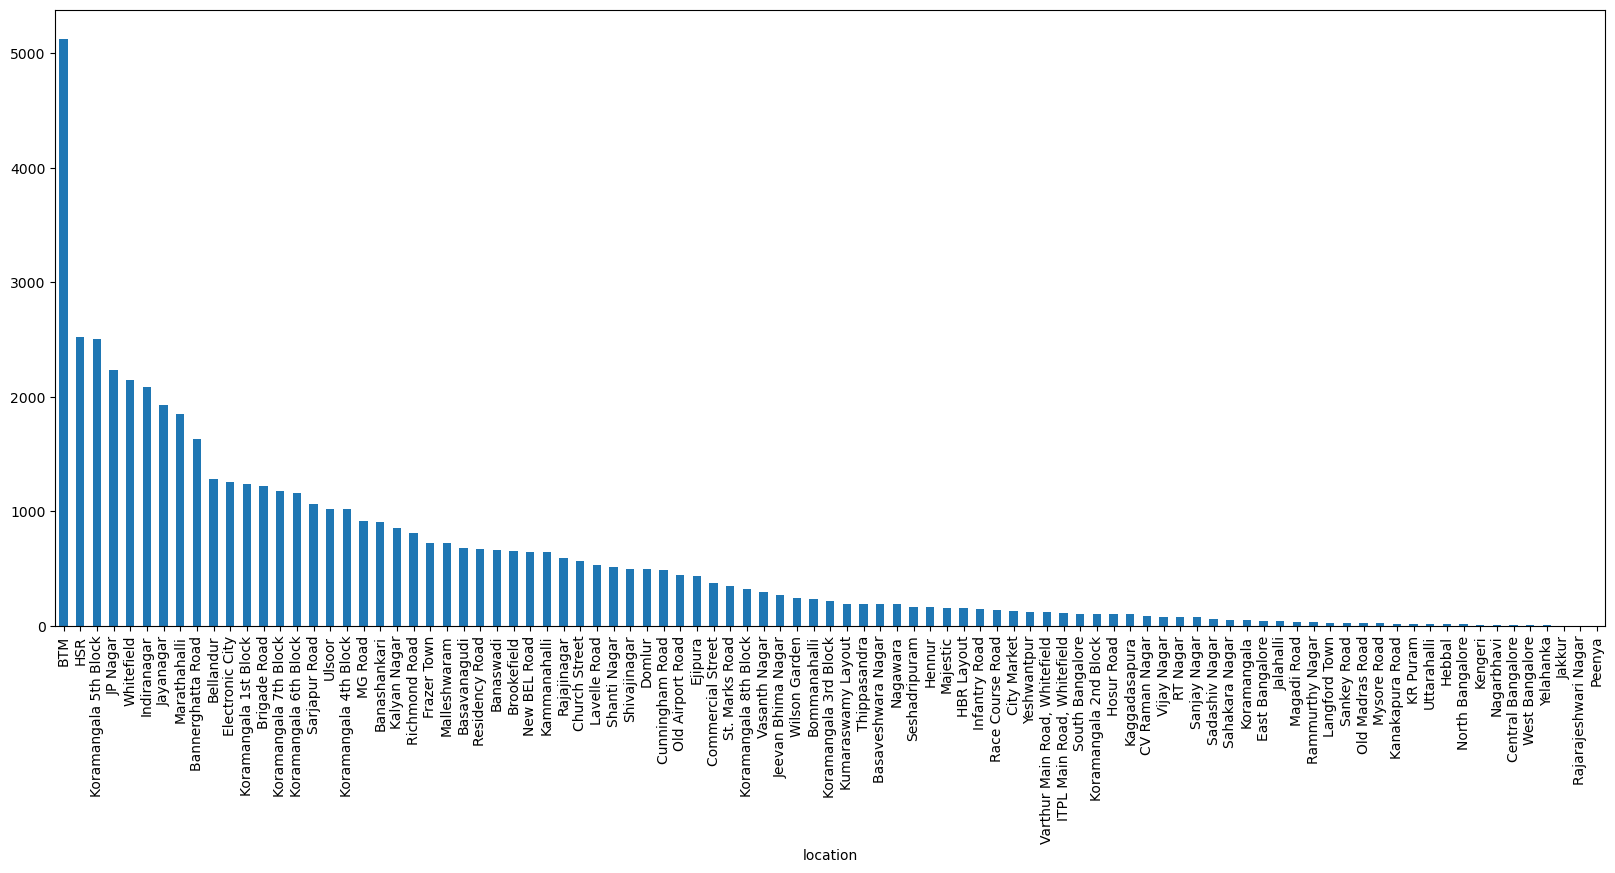

In [41]:
plt.figure(figsize=(20,8))
df.location.value_counts().plot(kind="bar")

In [42]:
df["location"]=df["location"].fillna(df["location"].mode()[0])

In [43]:
df.location.isna().sum()

0

In [44]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
Cost2plates        0
reviews_list       0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [45]:
df.duplicated().sum()

72

In [46]:
df.drop_duplicates()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cocktails, Butter Chicken, Beer, Biryani, Tand...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"Cocktails, Butter Chicken, Beer, Biryani, Tand...",Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,"Cocktails, Butter Chicken, Beer, Biryani, Tand...",Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,"Cocktails, Butter Chicken, Beer, Biryani, Tand...",Finger Food,2000,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Butter Chicken, Beer, Biryani, Tand...",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [47]:
df.name.nunique()

8792

In [48]:
df.shape

(51717, 13)

In [49]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Cost2plates', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [50]:
df.dtypes

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
Cost2plates          int32
reviews_list        object
listed_in(type)     object
listed_in(city)     object
dtype: object

# Checking outliers for numerical columns and removing it.

# 1.

<function matplotlib.pyplot.show(close=None, block=None)>

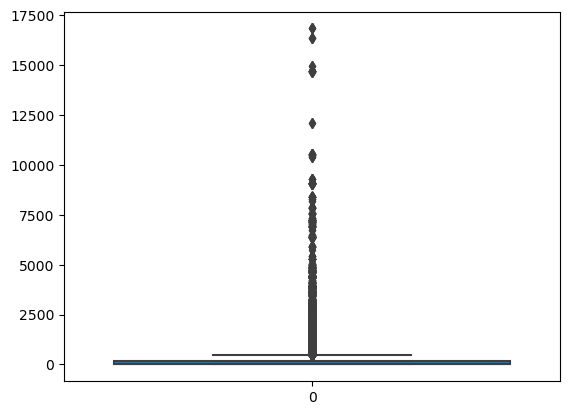

In [51]:
sns.boxplot(df.votes)
plt.show

In [52]:
q1=df["votes"].quantile(0.25)
q3=df["votes"].quantile(0.75)
IQR=q3-q1

In [53]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR
ul,ll

(484.5, -279.5)

In [54]:
df.loc[(df["votes"]>ll) | (df["votes"]<ul)].head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [55]:
df1=df.loc[(df["votes"] < ul) & (df["votes"] > ll)]
print("before removing outliers:",len(df))
print("after removing outliers:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outliers: 51717
after removing outliers: 44756
outliers: 6961


In [56]:
df1=df.copy()
df1.loc[(df1["votes"]>ul), "votes"]=ul
df1.loc[(df1["votes"]<ll), "votes"]=ll

<function matplotlib.pyplot.show(close=None, block=None)>

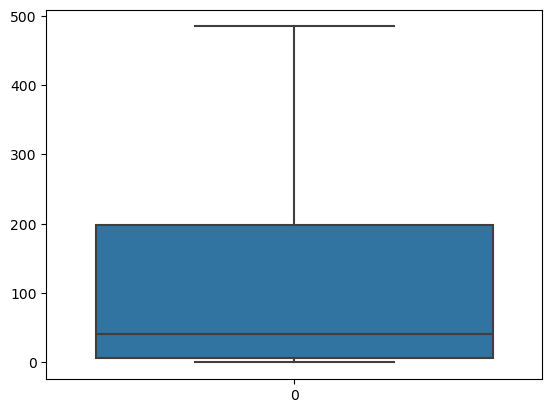

In [57]:
sns.boxplot(df1.votes)
plt.show

# 2.

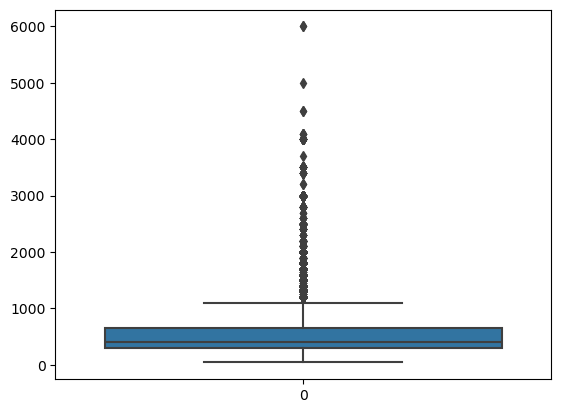

In [58]:
sns.boxplot(df.Cost2plates)
plt.show()

In [59]:
q1=df["Cost2plates"].quantile(0.25)
q3=df["Cost2plates"].quantile(0.75)
IQR=q3-q1

In [60]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR
ul,ll

(1175.0, -225.0)

In [61]:
df.loc[(df["Cost2plates"]>ul) | (df["Cost2plates"]<ll)].head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
67,Gustoes Beer House,No,No,4.1,868,Banashankari,Pub,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","Continental, Italian, Mexican, North Indian, C...",1200,"[('Rated 5.0', 'RATED\n Has a really calm roo...",Delivery,Banashankari
166,Patio 805,Yes,Yes,4.1,364,Jayanagar,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","Thai, Vietnamese, Asian, Chinese",1200,"[('Rated 4.0', ""RATED\n The number of good re...",Delivery,Banashankari
207,Chutney Chang,Yes,Yes,4.1,2339,Jayanagar,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Chinese, BBQ",1500,"[('Rated 4.0', 'RATED\n Great place for team ...",Delivery,Banashankari


In [62]:
df1=df.loc[(df["Cost2plates"]<ul) & (df["Cost2plates"]>ll)]
print("before removing outlier:",len(df))
print("after removing outlier:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outlier: 51717
after removing outlier: 46953
outliers: 4764


In [63]:
df1=df.copy()
df1.loc[(df1["Cost2plates"]>ul), "Cost2plates"]=ul
df1.loc[(df1["Cost2plates"]<ll), "Cost2plates"]=ll

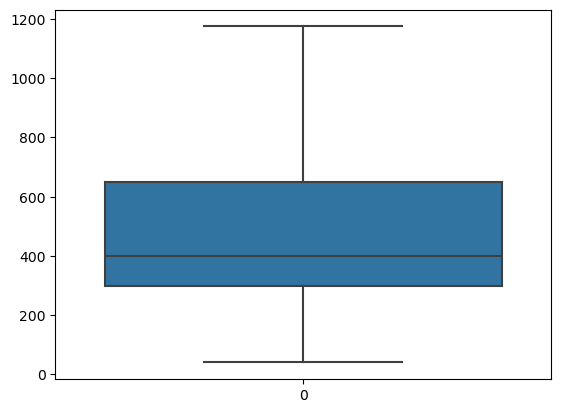

In [64]:
sns.boxplot(df1.Cost2plates)
plt.show()

# 3.

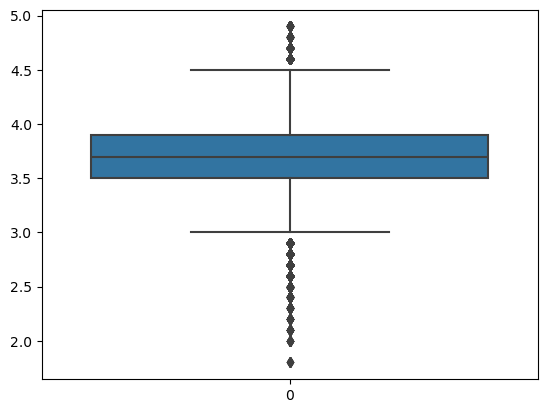

In [65]:
sns.boxplot(df.rate)
plt.show()

In [66]:
q1=df["rate"].quantile(0.25)
q3=df["rate"].quantile(0.75)
IQR=q3-q1

In [67]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR
ul,ll

(4.5, 2.9000000000000004)

In [68]:
df.loc[(df["rate"]>ul) | (df["rate"]<ll)].head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Cocktails, Butter Chicken, Beer, Biryani, Tand...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",Delivery,Banashankari
36,Fast And Fresh,Yes,No,2.8,91,Banashankari,Quick Bites,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Chinese, Fast Food",400,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",Delivery,Banashankari


In [69]:
df1=df.loc[(df["rate"]<ul) & (df["rate"]>ll)]
print("before removing outlier:",len(df))
print("after removing outlier:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outlier: 51717
after removing outlier: 48216
outliers: 3501


In [70]:
df1=df.copy()
df1.loc[(df1["rate"]>ul), "rate"]=ul
df1.loc[(df1["rate"]<ll), "rate"]=ll

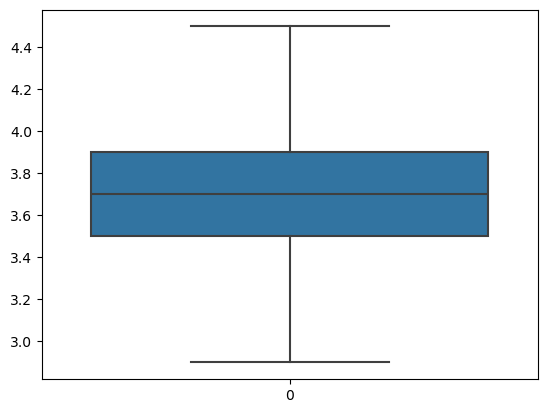

In [71]:
sns.boxplot(df1.rate)
plt.show()

In [72]:
df1=df.to_csv("C:\\Users\\kmm23\\Downloads.csv")

# EDA visualization.

Text(0, 0.5, 'book percentage')

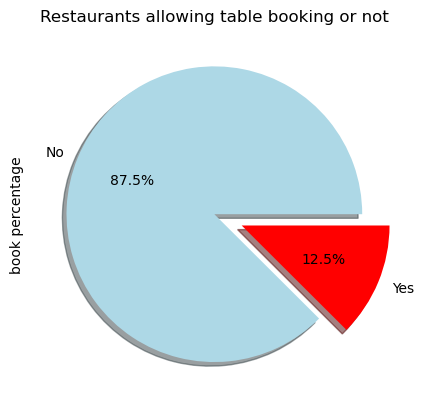

In [73]:
colors = [ 'lightblue' , 'red']
df['book_table'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.2], shadow=True, colors =colors)

plt.title('Restaurants allowing table booking or not')
plt.ylabel('book percentage')

<Axes: xlabel='online_order', ylabel='rate'>

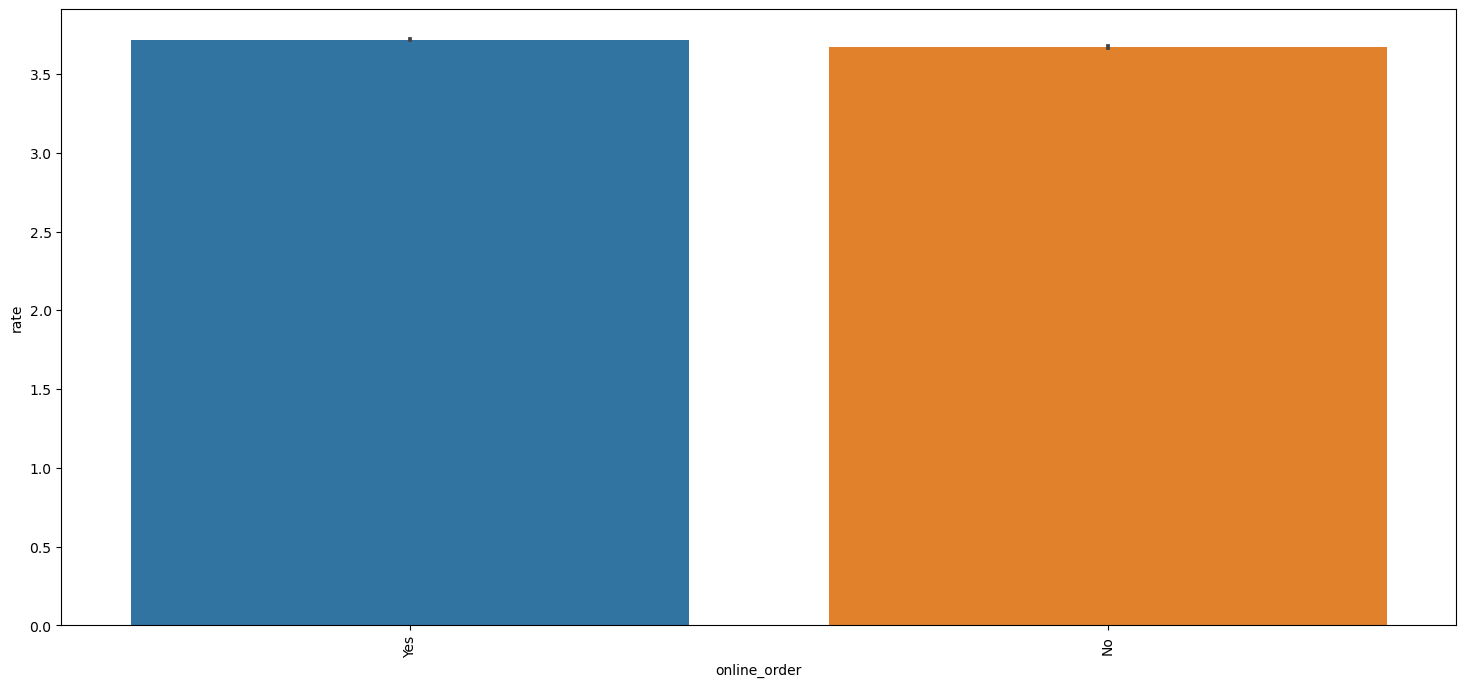

In [74]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x="online_order",y="rate",data=df)

<Axes: xlabel='listed_in(type)', ylabel='rate'>

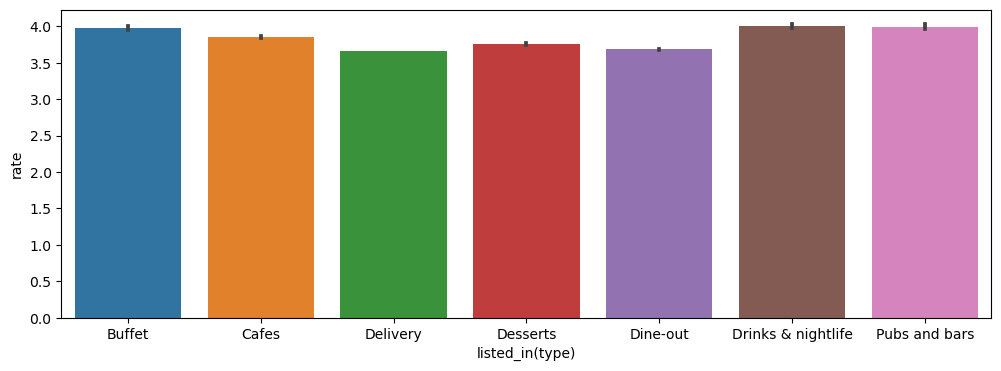

In [75]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='listed_in(type)',y='rate')

[]

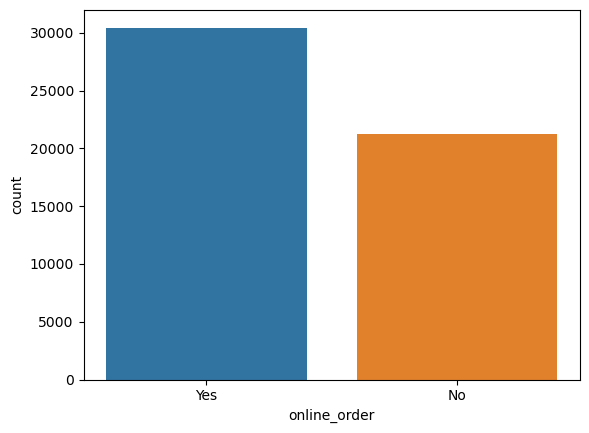

In [76]:
sns.countplot(data=df,x='online_order').plot(kind="bar")

[]

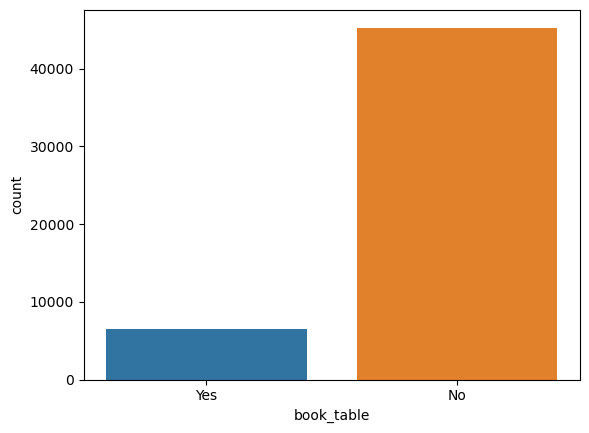

In [77]:
sns.countplot(data=df,x='book_table').plot(kind="bar")

[]

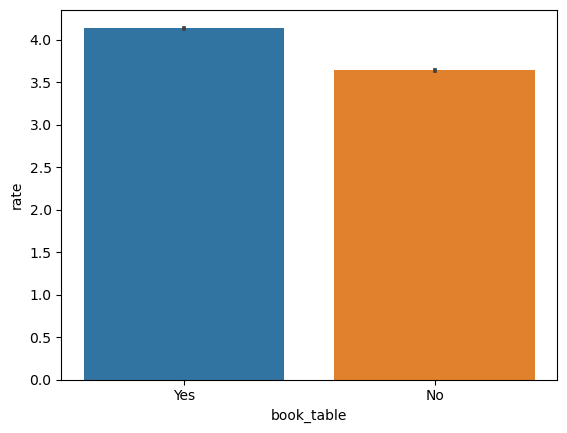

In [78]:
sns.barplot(data=df, x='book_table', y='rate').plot(kind="bar")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'HSR'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Indiranagar'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Bannerghatta Road'),
  Text(9, 0, 'Bellandur')])

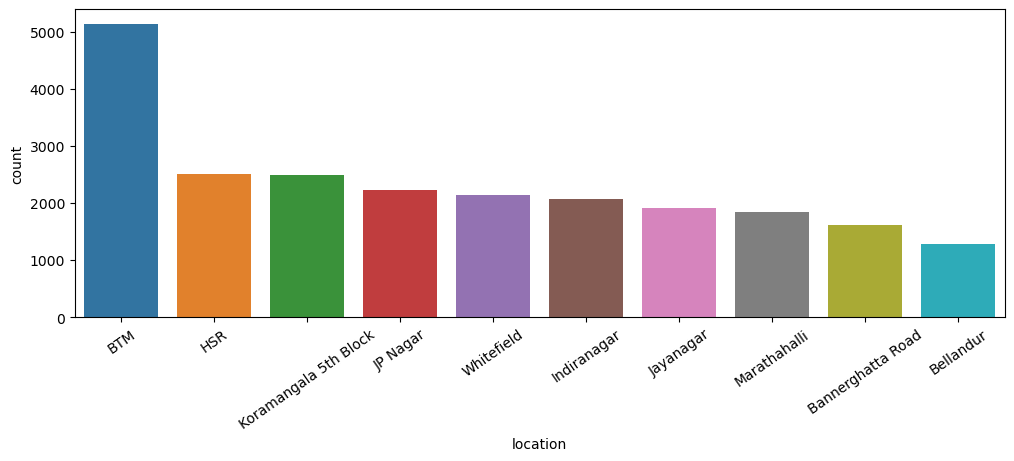

In [79]:
plt.figure(figsize=(12,4))
sns.countplot(x='location',data=df,order=df['location'].value_counts().index[:10])
plt.xticks(rotation=35)

# Encoding to transform the categorical data.

In [80]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [81]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [82]:
df.select_dtypes(include="object").head(1)

,name,online_order,book_table,location,rest_type,dish_liked,cuisines,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,Banashankari,Casual Dining,"Cocktails, Butter Chicken, Beer, Biryani, Tand...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [83]:
df.online_order.value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [84]:
df.book_table.value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [85]:
for i in df.select_dtypes(include="object"):
    df[i]=lb.fit_transform(df[i])

In [86]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
0,3690,1,1,4.1,775,1,27,0,2159,800,10851,0,1
1,7022,1,0,4.1,787,1,27,0,952,800,12530,0,1
2,6499,1,0,3.8,918,1,22,0,766,800,4652,0,1
3,199,0,0,3.7,88,1,78,0,2555,300,9293,0,1
4,2940,0,0,3.8,166,4,27,0,2188,600,15505,0,1


# Splitting Data into x and y.

In [87]:
y=df["rate"]
x=df.drop(["rate"],axis=1)

In [88]:
print("Shape of y:",y.shape)
print("Shape of x:",x.shape)

Shape of y: (51717,)
Shape of x: (51717, 12)


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# check the correlation of y variable with every x(independent) variable.

In [90]:
corr=df.corrwith(df.rate).abs().sort_values(ascending=False)

In [91]:
corr

rate               1.000000
votes              0.427443
book_table         0.413474
Cost2plates        0.364812
rest_type          0.200313
reviews_list       0.199557
location           0.078727
cuisines           0.078077
online_order       0.059579
listed_in(type)    0.031567
listed_in(city)    0.016127
name               0.010903
dish_liked         0.006669
dtype: float64

In [92]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score

# linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [93]:
lr=LinearRegression()
lr=lr.fit(X_train,y_train)

In [94]:
lr.coef_

array([ 1.11182864e-06,  8.41525961e-02,  2.59412968e-01,  1.37328997e-04,
        4.24387363e-04, -8.51642447e-04, -1.13797860e-15, -1.42676268e-05,
        1.09426430e-04,  1.33837322e-05, -1.12164115e-03, -2.03400746e-04])

In [95]:
lr.intercept_

3.3952689257767874

In [96]:
(X_test)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,listed_in(type),listed_in(city)
8440,3921,1,0,179,0,78,0,2307,250,5913,2,0
23575,485,1,0,165,3,78,0,1667,450,1391,4,12
16711,1393,0,0,23,22,78,0,1823,400,19519,2,10
42588,5698,0,0,8,83,78,0,1898,200,22319,2,21
5266,1835,1,0,43,83,14,0,367,150,6739,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5570,1806,1,0,32,18,78,0,895,500,15876,2,5
8626,323,1,0,0,32,78,0,1865,400,20591,2,0
42228,4420,0,0,7,52,26,0,708,200,10724,1,21
18533,1609,1,0,114,27,20,0,600,450,9102,3,11


In [97]:
y_test

8440     3.9
23575    2.8
16711    3.8
42588    3.5
5266     3.5
        ... 
5570     3.7
8626     3.7
42228    3.6
18533    4.1
42485    3.9
Name: rate, Length: 15516, dtype: float64

In [98]:
lr.score(X_train,y_train)

0.32445684187928714

In [99]:
lr.score(X_test,y_test)

0.33132858104596585

In [100]:
pred=lr.predict(X_test)

In [101]:
print("r2_SCORE:",r2_score(y_test,pred))

r2_SCORE: 0.33132858104596585


In [102]:
print("Train Error: ",lr.score(X_train,y_train))
pred=lr.predict(X_test)
print("---"*21)
print("Test Error: ",lr.score(X_test,y_test))
print("---"*21)
print("MSE:",mean_squared_error(y_test,pred))
print("---"*21)
print("r2_SCORE:",r2_score(y_test,pred))

Train Error:  0.32445684187928714
---------------------------------------------------------------
Test Error:  0.33132858104596585
---------------------------------------------------------------
MSE: 0.10402135746777219
---------------------------------------------------------------
r2_SCORE: 0.33132858104596585


# Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
from sklearn.metrics import mean_squared_error,r2_score

In [105]:
dt=DecisionTreeRegressor()

In [106]:
dt=DecisionTreeRegressor(max_depth=4,max_features=7)

In [107]:
dt=dt.fit(X_train,y_train)

In [108]:
pred1=dt.predict(X_test)

In [109]:
print("r2_SCORE:",r2_score(y_test,pred1))

r2_SCORE: 0.4610951010361376


In [110]:
print("Train Error: ",dt.score(X_train,y_train))
pred=dt.predict(X_test)
print("---"*21)
print("Test Error: ",dt.score(X_test,y_test))
print("---"*21)
print("MSE:",mean_squared_error(y_test,pred1))


Train Error:  0.4693209097693689
---------------------------------------------------------------
Test Error:  0.4610951010361376
---------------------------------------------------------------
MSE: 0.08383432811281426


# Build gridsearchcv model for better stability and accuracy of DecisiontreeRegressor

In [111]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics

In [112]:
grid = {'max_depth': [5,6,7,8,9,10],
        'max_features': [5,6,7,8,9,10,11,12,13,14,15],
        'max_leaf_nodes': [3,4,5,6]}

In [113]:
DT_model_GS = GridSearchCV(DecisionTreeRegressor(), param_grid = grid, scoring = 'roc_auc', cv = 5, verbose = True)

In [115]:
DT_model_GS = DT_model_GS.fit(X_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


In [116]:
DT_model_GS.best_params_

{'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 3}

In [119]:
new_model=DecisionTreeRegressor(criterion="poisson",max_depth=5,max_features=5,max_leaf_nodes=4)

In [120]:
final_model=new_model.fit(X_train,y_train)

In [122]:
pred=final_model.predict(X_test)

In [124]:
print("r2_SCORE:",r2_score(y_test,pred))

r2_SCORE: 0.3118155209602923


# Reguralisation(Lasso)

In [147]:
from sklearn.linear_model import Lasso

In [148]:
l1=Lasso()

In [149]:
l1=l1.fit(X_train,y_train)
pred=l1.predict(X_test)

In [150]:
print("MSE:",mean_squared_error(y_test,pred))

MSE: 0.11010100137967739


# import Random forest regressor.

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [155]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [156]:
pred=rf.predict(X_train)

In [157]:
print(r2_score,(y_train,pred))

<function r2_score at 0x0000025F437307C0> (13604    3.7
9604     3.4
9437     3.7
5787     3.7
42155    3.4
        ... 
11284    3.7
44732    4.2
38158    4.0
860      3.7
15795    4.6
Name: rate, Length: 41373, dtype: float64, array([3.7  , 3.398, 3.695, ..., 4.   , 3.7  , 4.581]))


In [158]:
pred2=rf.predict(X_test)

In [159]:
y_test

8440     3.9
23575    2.8
16711    3.8
42588    3.5
5266     3.5
        ... 
49217    4.1
39524    4.0
47849    3.1
30475    3.7
45307    3.3
Name: rate, Length: 10344, dtype: float64

# Just compare the Actual value and predicted value.

In [160]:
df0=pd.DataFrame({"Actual":y_test,"predicted":pred2})

In [161]:
df0

,Actual,predicted
8440,3.9,3.852
23575,2.8,2.808
16711,3.8,3.785
42588,3.5,3.497
5266,3.5,3.476
...,...,...
49217,4.1,3.957
39524,4.0,3.948
47849,3.1,3.100
30475,3.7,3.700


In [162]:
print("r2_value :",r2_score(y_test,pred2))

r2_value : 0.9323871000033055


In [163]:
print("mean_squared_error:",mean_squared_error(y_test,pred2))

mean_squared_error: 0.010549048433874724


# intall Xgboost library.

In [164]:
!pip install xgboost

# import XGB Random forest regressor.

In [165]:
from xgboost import XGBRFRegressor

In [166]:
xg=XGBRFRegressor(n_estimator=100,random_state=42,cv=6)

In [174]:
xg.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, cv=6, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimator=100, n_estimators=None,
               n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', ...)

In [175]:
xg1=xg.fit(x,y)

In [176]:
pred3=xg.predict(X_test)

In [177]:
print("r2_value :",r2_score(y_test,pred3))

r2_value : 0.5585997876691129


In [178]:
print("mean_squared_error :",mean_squared_error(y_test,pred3))

mean_squared_error : 0.06886780804888948


# import joblib to save the model for future prediction.

In [201]:
import joblib

In [202]:
joblib.dump(xg,"zomato_rating_analysis")

['zomato_rating_analysis']

In [203]:
model=joblib.load("zomato_rating_analysis")

# Prediction on new or unseen data.

In [205]:
model.predict(np.array([[4.5,3.9,2.6,1.5,5.0,4.7,3.9,2.8,1.6,4.2,2.4,4.3]]))[0]

3.6424823

# which algorithm gives us the best accuracy.

In [206]:
Best_Accuracy = pd.DataFrame({'Models':['lr','dt','rf','xg'],
              "ACC":[r2_score(y_test,pred)*100,
                     r2_score(y_test,pred1)*100,
                     r2_score(y_test,pred2)*100,
                     r2_score(y_test,pred3)*100
                    ]})

In [208]:
Best_Accuracy

,Models,ACC
0,lr,33.328974
1,dt,44.560365
2,rf,93.238710
3,xg,55.859979


<Axes: >

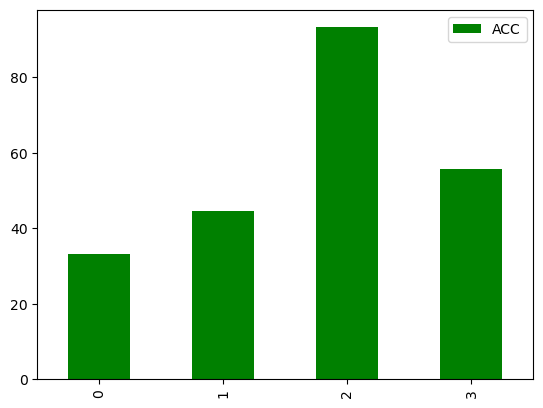

In [210]:
Best_Accuracy.plot(kind="bar",color="green")